<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/GDP_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set_style('darkgrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
print("All the necessary packages have been included successfully!")

All the necessary packages have been included successfully!


## 2. Adding Table Formatters

In [3]:
from google.colab import data_table
from vega_datasets import data

data_table.enable_dataframe_formatter()

## 3. Loading and displaying the data

In [4]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/GDP.csv'
df = pd.read_csv(url,error_bad_lines=False)

df.head(10)

,year,rank,country,state,gdp,gdp_percent
0,1960,1,the United States,America,543300000000,0.468483
1,1960,2,United Kingdom,Europe,73233967692,0.063149
2,1960,3,France,Europe,62225478000,0.053656
3,1960,4,China,Asia,59716467625,0.051493
4,1960,5,Japan,Asia,44307342950,0.038206
5,1960,6,Canada,America,40461721692,0.034890
6,1960,7,Italy,Europe,40385288344,0.034824
7,1960,8,India,Asia,37029883875,0.031931
8,1960,9,Australia,Oceania,18577668271,0.016019
9,1960,10,Sweden,Europe,15822585033,0.013644


## 4. Display the dataframe information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10134 entries, 0 to 10133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         10134 non-null  int64  
 1   rank         10134 non-null  int64  
 2   country      10134 non-null  object 
 3   state        10134 non-null  object 
 4   gdp          10134 non-null  int64  
 5   gdp_percent  10134 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 475.2+ KB


## 5. Check for NULL values

In [6]:
print(df.isnull().values.any())

False


## 6. Summarizing the entire dataset

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
year,10134,NaN,NaN,NaN,1993.58,16.8417,1960,1980,1995,2008,2020
rank,10134,NaN,NaN,NaN,87.3531,53.689,1,42,84,128,206
country,10134,209,Dominica,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,10134,5,Africa,2854,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gdp,10134,NaN,NaN,NaN,1.77358e+11,9.52289e+11,8.82445e+06,1.38073e+09,7.55996e+09,4.99566e+10,2.14332e+13
gdp_percent,10134,NaN,NaN,NaN,0.00601934,0.0274802,3.55068e-07,8.87524e-05,0.000365021,0.00249974,0.468483


## 7. Displaying statistical insights

In [8]:
print("Mean GDP =",df['gdp'].mean())
print("Median GDP =",df['gdp'].median())
print("Mean GDP % =",df['gdp_percent'].mean())
print("Median GDP % =",df['gdp_percent'].median())

Mean GDP = 177358395462.17416
Median GDP = 7559956503.5
Mean GDP % = 0.00601934083283995
Median GDP % = 0.00036502132502835925


## 8. Visualization of Insights

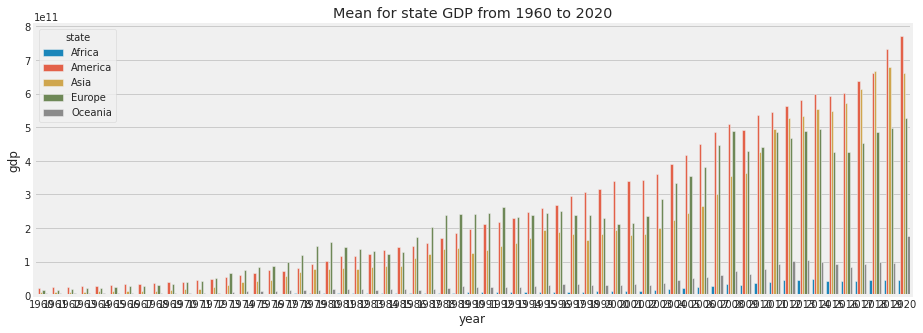

In [9]:
fig=plt.figure(figsize=(14,5))
tmp = df[['year','state','gdp']].groupby(['year','state']).mean().reset_index()
sns.barplot(data=tmp,x='year',y='gdp',hue='state')
plt.title('Mean for state GDP from 1960 to 2020')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


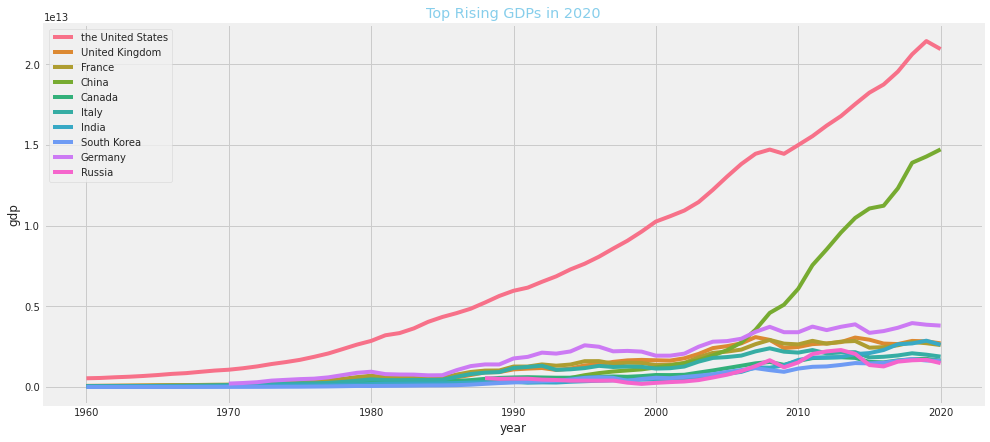

In [10]:
countries = list(df[df['year']==2020][df['rank']<=10]['country'].unique())
tmp = df.copy()
tmp['top10'] = tmp['country'].apply(lambda x:x in countries)
tmp = tmp[tmp['top10']==True].sort_values('year')
fig = plt.figure(figsize=(15,7))
sns.lineplot(data=tmp,x='year',y='gdp',hue='country')
plt.title('Top10 GDP countries in 2020',color="skyblue",size=40)
tmp['gdp_growth'] = tmp['gdp'] - tmp['gdp'].shift(1)
plt.legend()
plt.title("Top Rising GDPs in 2020")
plt.show()